## Assignment 5B

### Problem 1 (100 Points)
Anharmonic Oscillator. Consider the Schrodinger equation for a particle of mass m in the anharmonic potential $V(x)=V_0\tfrac{x^4}{a^4}$:
$$-\dfrac{1}{2}\dfrac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)$$
where $V_0$ and $a$ are constants. For simplicity, in this exercise set $\tfrac{V_0}{a^4}=\tfrac{1}{2}$.

After converting this second-order equation into a 2-dimensional first-order equation, write a program to solve this system using the shooting method and the 4th-order Runge-Kutta (RK4) method.

As explained in class, you will need to write a program to find the energies, starting with an initial guess for the energy and using a root-finding method to refine the guess until you find accurate values.

We can write the differential equation as:
$$\begin{align}
-\dfrac{1}{2}\dfrac{d^2\psi(x)}{dx^2}+\dfrac{1}{2}x^4\psi(x)&=E\psi(x)\\
\dfrac{d^2\psi(x)}{dx^2}-x^4\psi(x)&=-2E\psi(x)\\
\dfrac{d^2\psi(x)}{dx^2}&=\left(x^4-2E\right)\psi(x)\\
\end{align}$$
Converting into 2 differential equations, we get:
$$\begin{align}
\dfrac{d\psi(x)}{dx}&=\phi(x)\\
\dfrac{d\phi(x)}{dx}&=\left(x^4-2E\right)\psi(x)\\
\end{align}$$

#### Problem 1.A (30 Points)
Use Simpson’s method to calculate the relevant numerical integral in the WKB
formula:
$$B=\int_{-1}^1\sqrt{1-s^4}\ ds$$
and obtain the corresponding WKB approximations to the eigenvalues:
$$E_n\sim\dfrac{1}{2}\left(\pi\dfrac{n+\tfrac{1}{2}}{B}\right)^\tfrac{4}{3}$$
**Hint:** Note that the integrand of $B$ is relatively steep near the integration boundaries. Make sure to use a sufficiently tight mesh to have at least $4$ significant digits of accuracy in the eigenvalues, for $n = 0, 1, ..., 6$.

In [3]:
import numpy as np

def simpson(f: callable,
            a: float|int,
            b: float|int, *,
            dx: float|int|None = None,
            N: int|None = None
            ) -> float:
    # Function requirements
    assert callable(f)
    assert isinstance(a, (int, float))
    assert isinstance(b, (int, float))
    assert N is not None or dx is not None
    assert not (N is not None and dx is not None)
    if N is not None: assert isinstance(N, int)
    if dx is not None: assert isinstance(dx, (int, float))

    # Calculate the integral
    if N is not None:
        x = np.linspace(a, b, N+1)
        return np.sum(f(x[:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * (b-a)/(3*N)
    elif dx is not None:
        x = np.arange(a, b+dx, dx)
        return np.sum(f(x[:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * dx/3
    else:
        raise Exception("Something went wrong...")

def WKB_energy(n: int) -> float:
    B = simpson(lambda x: np.sqrt(1-x**4), -1, 1, N=1_000_000)
    internal = np.pi*(n + 1/2)/B
    return (1/2) * internal**(4/3)

B = simpson(lambda x: np.sqrt(1-x**4), -1, 1, N=1_000_000)
print(f"{B=:.10f}")
print(f"{WKB_energy(0)=:.10f}")
print(f"{WKB_energy(1)=:.10f}")
print(f"{WKB_energy(2)=:.10f}")
print(f"{WKB_energy(3)=:.10f}")
print(f"{WKB_energy(4)=:.10f}")
print(f"{WKB_energy(5)=:.10f}")
print(f"{WKB_energy(6)=:.10f}")

B=1.7480383686
WKB_energy(0)=0.4335726635
WKB_energy(1)=1.8759599631
WKB_energy(2)=3.7069941290
WKB_energy(3)=5.8057626767
WKB_energy(4)=8.1168073520
WKB_energy(5)=10.6068266870
WKB_energy(6)=13.2531677648


#### Problem 1.B (50 Points)
Start from one of the boundaries—in a similar fashion as in the example of the
infinite square well discussed in class. Calculate the eigenfunctions and the eigenvalues of the problem for $n = 0, 1, ..., 6$ (for simplicity, you are not required to normalize the wavefunctions in this exercise).

Minimized Energy: 0.5301808885663564


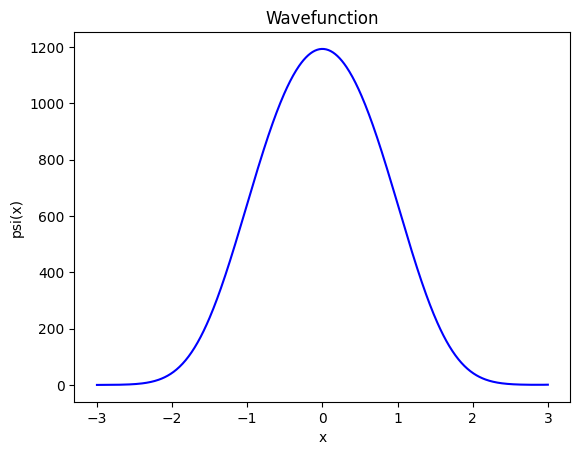

Minimized Energy: 1.899836789611559


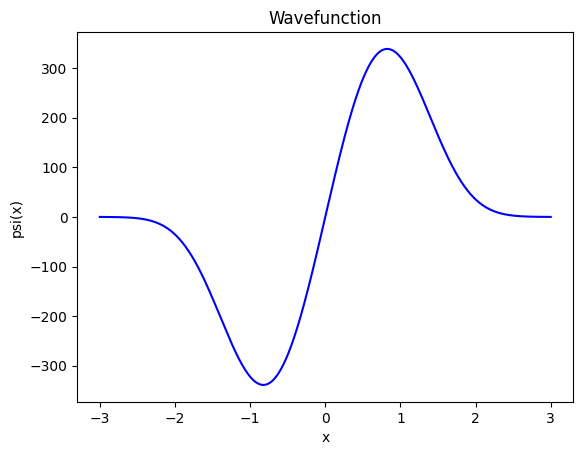

Minimized Energy: 3.727851091606191


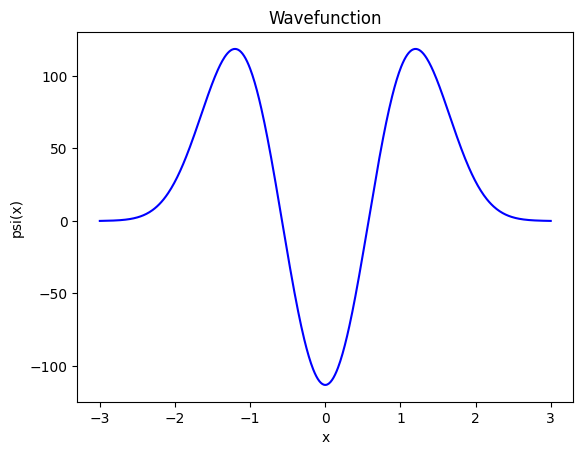

Minimized Energy: 5.82238579759885


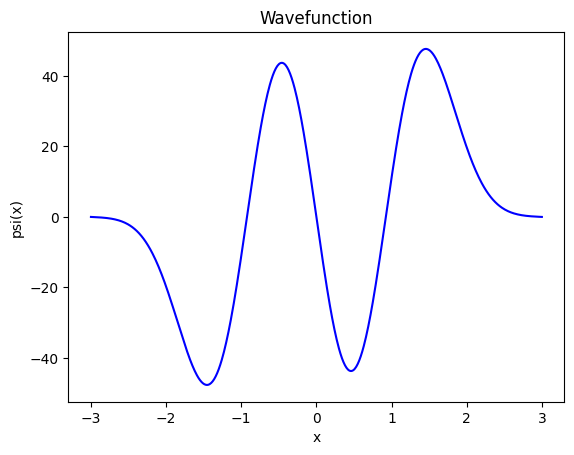

Minimized Energy: 8.130980250748506


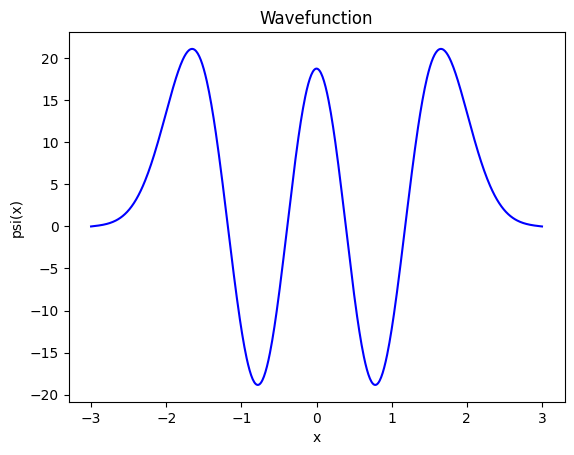

Minimized Energy: 10.619486066659416


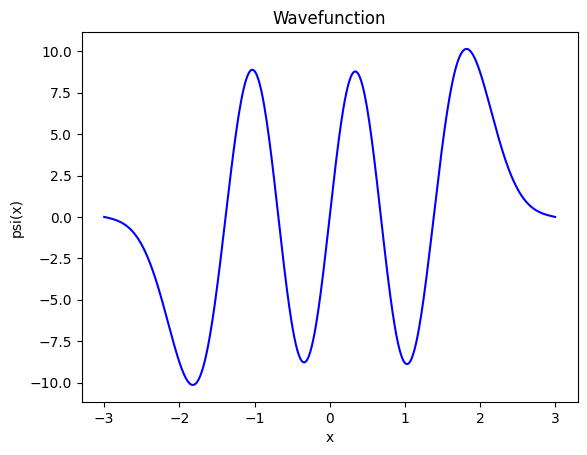

Minimized Energy: 13.265404494427802


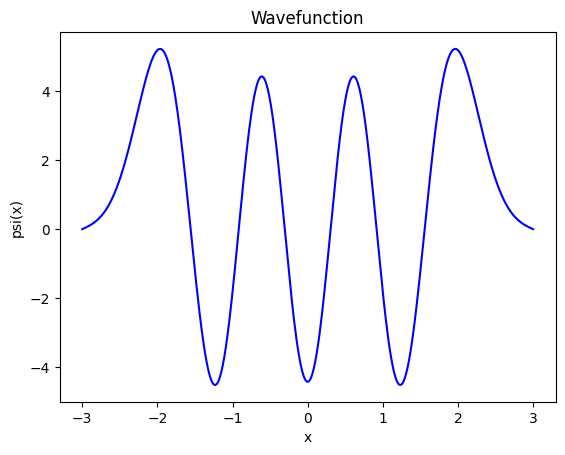

In [26]:
import numpy as np

# Functions I made for this problem
def continuous_runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    """
    Runge-Kutta Method for solving ordinary differential equations.
    This function solves the ODE using the Runge-Kutta Method and returns the time and value arrays.
    
    Parameters:
        f: callable - The function equal to the derivative of the unknown function
        t0: float | int - The initial time
        x0: float | int - The initial value(s)
        dt: float | int - The time step
        tf: float | int - The final time

    Returns:
        tuple[np.ndarray, np.ndarray] - The time and value arrays
    """

    # Input Checking
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))

    # Implementation
    T = np.arange(t0, tf+dt, dt)
    x = [x0]
    for t in T[:-1]:
        k1 = f(t       , x[-1]          )
        k2 = f(t + dt/2, x[-1] + k1*dt/2)
        k3 = f(t + dt/2, x[-1] + k2*dt/2)
        k4 = f(t + dt  , x[-1] + k3*dt  )
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return T, x
def continuous_secant_method_value(*,
    f: callable, 
    x0: int | float, 
    x1: int | float, 
    error: int | float, 
    max_iter: int
) -> float:
    """
    Secant Method for Continuous Functions (Single Variable)
    Returns the value of x that is the root of the function

    Parameters
    ----------
    f : callable
        The function to find the root of
    x0 : int | float
        The first guess of the root
    x1 : int | float
        The second guess of the root
    error : int | float
        The error tolerance
    max_iter : int
        The maximum number of iterations

    Returns
    -------
    float
        The value of x that is the root of the function
    """

    # Type Checking
    assert callable(f)
    assert isinstance(x0, (int, float))
    assert isinstance(x1, (int, float))
    assert x0 != x1, "Guesses x0 and x1 cannot be the same"
    assert isinstance(error, (int, float))
    assert error > 0
    assert isinstance(max_iter, int)
    assert max_iter > 0

    # Implementation
    for _ in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if np.abs(x2 - x1) < error:
            return x2
        x0, x1 = x1, x2
    else:
        return x2

# Problem Parameters
Δx = 3
x0: float = -Δx


def plot_example(min_energy, max_energy, neg=False):
    psi0: np.ndarray = np.array([0, 1 * (-1 if neg else 1)])  # [psi(x0), psi'(x0)]

    # Wavefunction ODE
    minimized_energy = continuous_secant_method_value(
        f=lambda E: continuous_runge_kutta_method_function(
            lambda x, psi: np.array([psi[1], (x**4-2*E)*psi[0]]),
            t0=-Δx, x0=psi0, dt=0.01, tf=Δx
        )[1][-1][0],
        x0=min_energy,
        x1=max_energy,
        error=1e-4,
        max_iter=100
    )
    print(f"Minimized Energy: {minimized_energy}")

    # Find the wavefunction
    val = continuous_runge_kutta_method_function(
        f=lambda x, psi: np.array([psi[1], (x**4-2*minimized_energy)*psi[0]]),
        t0=-Δx, x0=psi0, dt=0.01, tf=Δx
    )
    position = val[0]
    wavefunction = np.array([v[0] for v in val[1]])

    # Plot the results
    import matplotlib.pyplot as plt
    plt.plot(position, wavefunction, color="blue")
    plt.xlabel("x")
    plt.ylabel("psi(x)")
    plt.title("Wavefunction")
    plt.show()

# Examples
if 1: plot_example(0, 0.5)
if 1: plot_example(1.5, 2, neg=True)
if 1: plot_example(3, 4)
if 1: plot_example(5, 6, neg=True)
if 1: plot_example(7, 8)
if 1: plot_example(10, 11, neg=True)
if 1: plot_example(13, 14)

#### Problem 1.C (20 Points)
Compare your numerical energy eigenvalues with the WKB energies and plot the results as a function of the excitation number $n$.

|  n  |     Exact     |      Analytic      |
| --- | ------------- | ------------------ |
|  0  |  0.4335726635 |  0.530180888566356 |
|  1  |  1.8759599631 |  1.899836789611559 |
|  2  |  3.7069941290 |  3.727851091606191 |
|  3  |  5.8057626767 |  5.82238579759885  |
|  4  |  8.1168073520 |  8.130980250748506 |
|  5  | 10.6068266870 | 10.619486066659416 |
|  6  | 13.2531677648 | 13.265404494427802 |


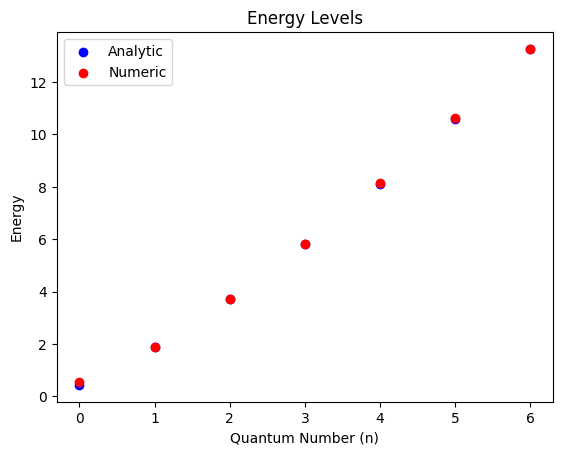

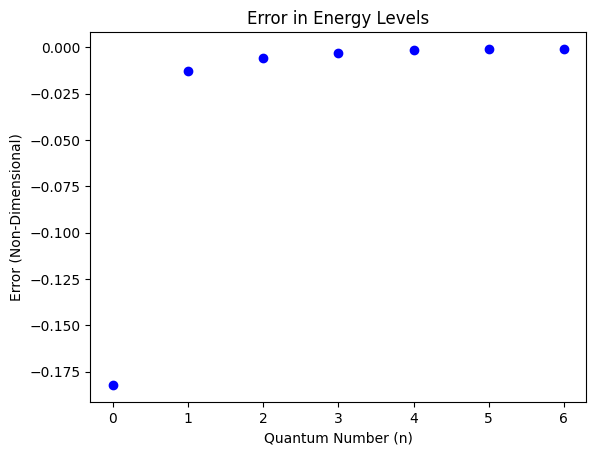

In [28]:
from matplotlib import pyplot as plt
import numpy as np

analytic = np.array([0.4335726635, 1.8759599631, 3.7069941290, 5.8057626767, 8.1168073520, 10.6068266870, 13.2531677648])
numeric =  np.array([0.530180888566356, 1.899836789611559, 3.727851091606191, 5.82238579759885, 8.130980250748506, 10.619486066659416, 13.265404494427802])
error  = (analytic - numeric)/numeric

# Normal Plot
plt.scatter(range(len(analytic)), analytic, color='blue', label='Analytic')
plt.scatter(range(len(numeric)), numeric, color='red', label='Numeric')
plt.xlabel('Quantum Number (n)')
plt.ylabel('Energy')
plt.title('Energy Levels')
plt.legend()
plt.show()

# Error Plot
plt.scatter(range(len(error)), error, color='blue')
plt.xlabel('Quantum Number (n)')
plt.ylabel('Error (Non-Dimensional)')
plt.title('Error in Energy Levels')
plt.show()

Discuss the agreement as a function of $n$.

> The agreement is pretty poor in the beginning, $n=0$, but as the principle quantum number gets higher it starts to approach much more similar values of energy.